# <span style="color:blue">**Women in Tech - Colleges**</span><br>

Author: Ester Giménez Mojón

## <span style="color:blue">**HND Web Development**</span><br>

SQA awards HND courses in "Web Development" and "Digital Design and Web Development". Both options were included under the label of "Web Development". <br>

This notebook presents 15 years of data extracted from the website of the INFACT, Scottish Founding Council,  https://stats.sfc.ac.uk/infact/QueryBuilder/Basic.<br>

Their website has three types of queries for extracting data from colleges in Scotland. In this work, I used the Basic and the Complex queries. More information about the queries is in the report.<br>

The two queries were used for every year, from 2005-2006 to 2019-2020, for every college and every geographical area.<br>

When both queries are compared, the totals with the complex query are bigger than the totals obtained with the basic query. The reason is a highly unusual number of "5" in the column of the girls. We believe that the real totals are found in the basic query, so we calculated the difference between both totals (column "Difference"). <br>

In order for the totals to match the "real" total, the number of girls had to be modified in all occasions, except in two, in which the number of boys had to be modified as well. The number of females in the complex query is in column "Females" and the modified number in the column "Female real".<br>

As a result, the real numbers of boys and girls are unknown. The assumption on which totals are correct and what to modify (if boys or girls) does not give insurance on the real situation. However, and without modifications, it is clear that the proportion of girls vs boys in colleges is 1:3 to 1:6, depending on the college and the year. In order to present the assumptions more clearly, the graphs show both the number of females with the complex query and the number with the basic query. 
<br>


The females from the complex query are in red and are not reliable. The females in blue ("Females real") come from calculation of the difference between the totals of the complex query and the totals of the basic query, and are more reliable, though not verifiable.<br>

For more information about the calculations used, please see the report and the complete dataset.<br>

In [54]:
import pandas as pd
import janitor
import geopandas as gpd
import numpy as np
import folium
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import os.path as path

# HND Digital Design and Web Development / Web Development
cs_web = pd.read_csv("https://github.com/EsterGM/Women-In-Tech/tree/main/Demographics/HND-gender-WebDev2.csv")


#### DESCRIPTION OF THE DATASET, after modifications<br>

There are 89 lines for all colleges that offered Web Development courses since 2005 in all Scotland. The totals sum up the numbers of all colleges for every given year.<br>

For females, the 25% and 50% show "5", which is unusual. The column "Female real" shows 2 and 4, respectively, which seems more logical. The differences range between 3 and 6 girls, which is a very high difference, taking into account that what we assume to be the "wrong total" ranges from 5 to 7, while the "right total" goes from 2 to 7. Ranges are:<br>

- Boys range from 5 to 69.<br>
- Girls range from 2 to 16.<br>

In [55]:
cs_web.describe()

,Year,Male,Female,Difference,Female real
count,89.000000,89.000000,89.000000,89.000000,89.000000
mean,2011.404494,19.314607,6.112360,1.359551,4.752809
std,4.614008,12.849297,2.866096,1.632394,3.715083
min,2005.000000,5.000000,0.000000,0.000000,0.000000
25%,2007.000000,11.000000,5.000000,0.000000,2.000000
50%,2011.000000,15.000000,5.000000,0.000000,4.000000
75%,2016.000000,25.000000,7.000000,3.000000,7.000000
max,2019.000000,69.000000,16.000000,6.000000,16.000000


In [56]:
cs_web.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   Year                                      89 non-null     int64 
 1   College Region (Glasgow, Highlands, etc)  89 non-null     object
 2   College names (actual for each year)      89 non-null     object
 3   Male                                      89 non-null     int64 
 4   Female                                    89 non-null     int64 
 5   Difference                                89 non-null     int64 
 6   Female real                               89 non-null     int64 
dtypes: int64(5), object(2)
memory usage: 5.0+ KB


#### NUMBER OF BOYS/GIRLS IN WEB DEVELOPMENT COURSES COUNTING TOTALS BY REGIONS, REGARDLESS OF THE YEAR<br>

In [57]:
# Set year as index
cs_web = cs_web.set_index("Year", append = False)
# Rename the columns
cs_renamed = cs_web.rename(index=str, columns={'College Region (Glasgow, Highlands, etc)' : 'region', 'College names (actual for each year)' : 'college'})
# group the dataset by region
grouped1 = cs_renamed.groupby('region')
grouped11= grouped1.agg(np.sum)
grouped11

,Male,Female,Difference,Female real
region,,,,
Aberdeen and Aberdeenshire,187,53,0,53
Ayrshire,179,57,5,52
Dundee and Angus,72,31,5,26
Edinburgh and Lothians,432,123,26,97
Fife,85,26,8,18
Forth Valley,61,32,9,23
Glasgow,472,135,24,111
Lanarkshire,95,37,18,19
West,136,50,26,24


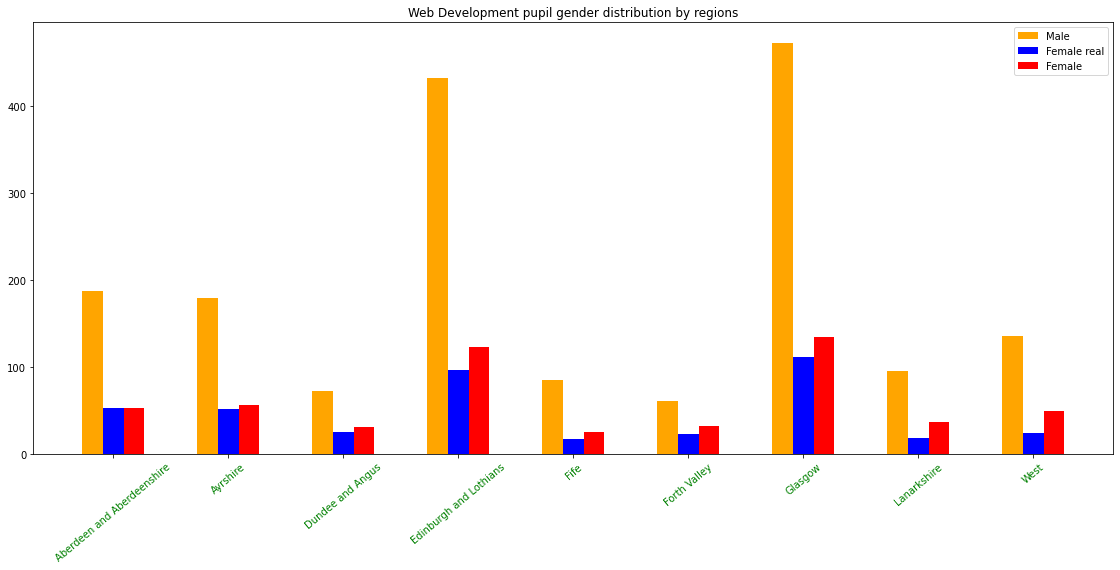

In [67]:
grouped1a = cs_renamed.groupby('region')
grouped11a= grouped1a.agg(np.sum)

fig, ax = plt.subplots(figsize =(15, 6))
ax = fig.add_axes([0,0,1,1])

index = np.arange(9) # there are 9 regions
bar_width = 0.18
width = bar_width

r11 = ax.bar(index+(bar_width*-1), grouped11a['Male'], width = bar_width, color = 'orange', label = 'Male')
r21 = ax.bar(index+(bar_width*0), grouped11a['Female real'], width = bar_width, color = 'blue', label = 'Female real')
r31 = ax.bar(index+(bar_width*1), grouped11a['Female'], width = bar_width, color = 'red', label = 'Female')

ax.set_xticks(index)
ax.set_xticklabels(grouped11a.index, color = 'green', rotation=40, horizontalalignment = 'center')

plt.title('Web Development pupil gender distribution by regions', loc ='center')
plt.legend()
plt.show()

The graph shows that the main hubs for learning web development are Edinburgh and Glasgow. I would have expected Dundee as well, due to the high number of game and data analysis companies located there, however, it looks like it is not a very popular subject in their college area.<br>

The proportion has been calculated dividing the "Male" amounts by the "Female real" amounts:<br>

<table>
  <thead>
    <tr>
       <th>Region</th>
       <th>Proportion boys/girls real</th>
    </tr>
  </thead>
  <tbody>
     <tr>
       <td>Aberdeen and Aberdeenshire</td>
       <td>3.5</td>
     </tr>
     <tr>
       <td>Ayrshire</td>
       <td>3.44</td>
     </tr>
     <tr>
       <td>Dundee and Angus</td>
       <td>2.77</td>
     </tr>
     <tr>
       <td>Edinburgh and Lothians</td>
       <td>4.45</td>
     </tr>
     <tr>
       <td>Fife</td>
       <td>4.72</td>
     </tr>
     <tr>
       <td>Forth Valley</td>
       <td>2.65</td>
     </tr>
     <tr>
       <td>Glasgow</td>
       <td>4.25</td>
     </tr>
     <tr>
       <td>Lanarkshire</td>
       <td>5</td>
     </tr>
     <tr>
       <td>West</td>
       <td>5.66</td>
     </tr>
  </tbody>
</table>

In relation to proportions, the worst regions are Lanarkshire and the West of Scotland, with girls vs boys 1:6.<br>
The best areas are Forth Valley and Dundee, with 1:2.6 / 2.7.<br>

#### NUMBER OF BOYS/GIRLS IN WEB DEVELOPMENT COURSES COUNTING TOTALS BY YEAR, REGARDLESS OF THE REGION / COLLEGE<br>

The data has been grouped by year, from 2005 to 2019, for the whole of Scotland.<br>

Between 2009 and 2012 there was a huge decrease in the number of students, including girls, even though their number was constant between 20 and 35 during the last 15 years. Girls had a maximum of 44 in 2015 and a minimum of 8 in 2010.<br>

The number of boys shows a different behaviour, with big increases and decreases during the whole period (from 41 to 161).<br>

The last 5 years show a more constant tendency for both, boys and girls, with a proportion of girls vs boys of 1:4.5.<br>

In [6]:
grouped2 = cs_renamed.groupby('Year')
grouped22= grouped2.agg(np.sum)
grouped22

,Male,Female,Difference,Female real
Year,,,,
2005,111,42,9,33
2006,115,41,10,31
2007,131,37,15,22
2008,97,48,22,26
2009,80,36,15,21
2010,41,15,7,8
2011,59,28,8,20
2012,67,22,4,18
2013,148,35,3,32


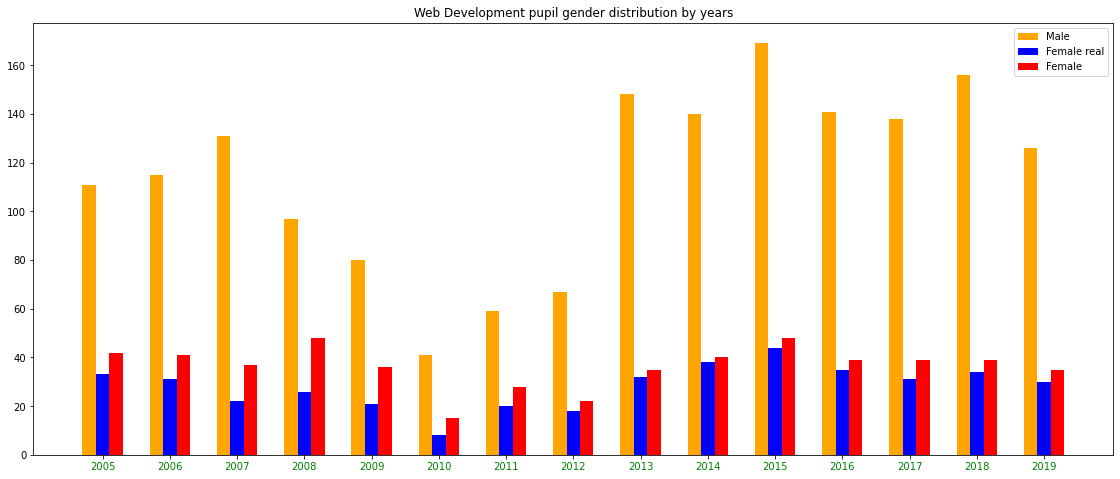

In [60]:
grouped2a = cs_renamed.groupby('Year')
grouped22a= grouped2a.agg(np.sum)
grouped22a

#x = grouped22a['Male']
#y = grouped22a['Female']
#z = grouped22a['Female real']

fig, ax = plt.subplots(figsize =(15, 6))
ax = fig.add_axes([0,0,1,1])

index = np.arange(15) # there are 15 years of data
bar_width = 0.2
width = bar_width

r1 = ax.bar(index+(bar_width*-1), grouped22a['Male'], width = bar_width, color = 'orange', label = 'Male')
r2 = ax.bar(index+(bar_width*0), grouped22a['Female real'], width = bar_width, color = 'blue', label = 'Female real')
r3 = ax.bar(index+(bar_width*1), grouped22a['Female'], width = bar_width, color = 'red', label = 'Female')

ax.set_xticks(index)
ax.set_xticklabels(grouped22a.index, color = 'green', rotation=0, horizontalalignment = 'center')

plt.title('Web Development pupil gender distribution by years', loc ='center')
plt.legend()
plt.show()

#### NUMBER OF BOYS/GIRLS IN WEB DEVELOPMENT COURSES COUNTING TOTALS BY COLLEGE, REGARDLESS OF THE REGION / YEAR<br>

The data shows the total number of boys/girls that attended courses in Web Development and/or digital design in the latest 15 years, shown by college totals.<br>

In [8]:
grouped3 = cs_renamed.groupby('college')
grouped33= grouped3.agg(np.sum)
grouped33

,Male,Female,Difference,Female real
college,,,,
Angus College,29,15,5,10
Ayrshire C. Kilw.,15,5,2,3
Ayrshire College,7,5,2,3
Central C. of Comm,15,5,2,3
Central Glasgow,25,10,1,9
City of Glasg Coll,337,85,3,82
Dundee College,43,16,0,16
Edin Telford Col,27,15,10,5
Edinburgh College,284,66,0,66


20 colleges offered Web Development and Digital Design in the last 15 years. However, some colleges seem to be duplicated:<br>
<br>
 - Forth Valley Colle<br>
 - Forth Valley College<br>
<br>
and<br>
<br>
 - Jewel & Esk V. Col<br>
 - Jewel and Esk Coll<br>
 - Jewel and Esk Valley College<br>
<br>
Both sets will be unified as "Forth Valley Coll" and "Jewel & Esk Valley Coll" respectively.<br>

In [79]:
# Replace duplicated names of colleges
cs_renamed['college'] =  cs_renamed['college'].replace(['Forth Valley College'], 'Forth Valley Coll')
cs_renamed['college'] =  cs_renamed['college'].replace(['Forth Valley Colle'], 'Forth Valley Coll')
cs_renamed['college'] =  cs_renamed['college'].replace(['Jewel & Esk V. Col'], 'Jewel & Esk Valley Coll')
cs_renamed['college'] =  cs_renamed['college'].replace(['Jewel and Esk Coll'], 'Jewel & Esk Valley Coll')
cs_renamed['college'] =  cs_renamed['college'].replace(['Jewel and Esk Valley College'], 'Jewel & Esk Valley Coll')

Performing again the grouping, it shows the correct amount of colleges, without duplicate names.<br>

The amount of students, boys and girls is the total of attendees from 2005 to 2019 for every college. For example, in Motherwell College, 2 girls and 20 boys studied Web Development in the last 15 years. That is a proportion of 1:10. <br>

In [80]:
grouped3a = cs_renamed.groupby('college')
grouped33a= grouped3a.agg(np.sum)
grouped33a

,Male,Female,Difference,Female real
college,,,,
Angus College,29,15,5,10
Ayrshire C. Kilw.,15,5,2,3
Ayrshire College,7,5,2,3
Central C. of Comm,15,5,2,3
Central Glasgow,25,10,1,9
City of Glasg Coll,337,85,3,82
Dundee College,43,16,0,16
Edin Telford Col,27,15,10,5
Edinburgh College,284,66,0,66


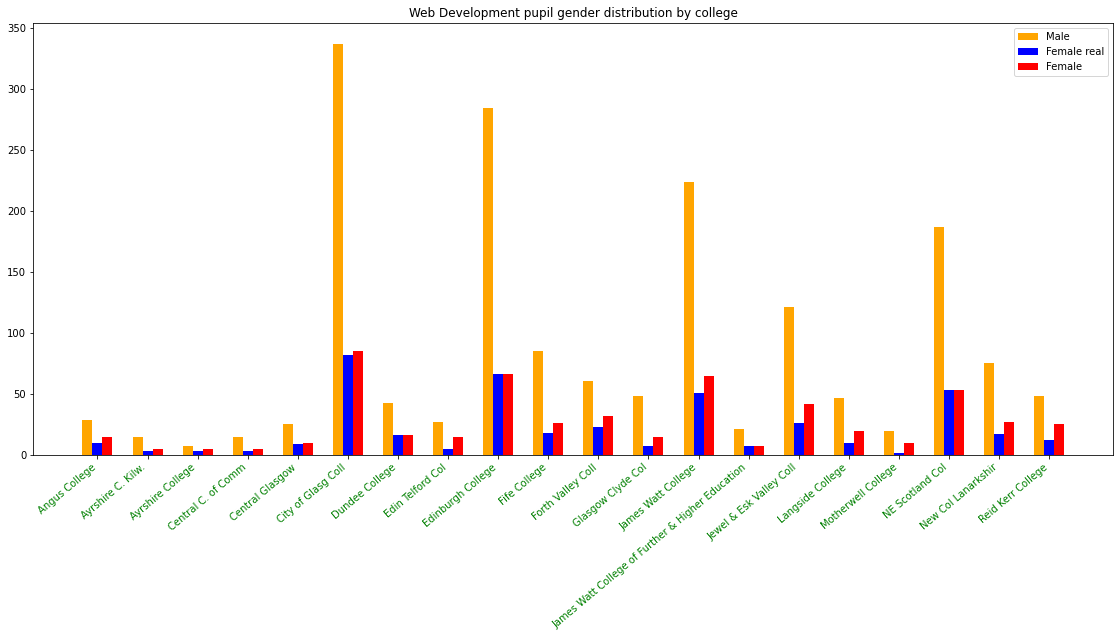

In [84]:
grouped3b = cs_renamed.groupby('college')
grouped33b= grouped3b.agg(np.sum)

fig, ax = plt.subplots(figsize =(15, 6))
ax = fig.add_axes([0,0,1,1])

index = np.arange(20) # there are 20 colleges
bar_width = 0.2
width = bar_width

r11 = ax.bar(index+(bar_width*-1), grouped33b['Male'], width = bar_width, color = 'orange', label = 'Male')
r21 = ax.bar(index+(bar_width*0), grouped33b['Female real'], width = bar_width, color = 'blue', label = 'Female real')
r31 = ax.bar(index+(bar_width*1), grouped33b['Female'], width = bar_width, color = 'red', label = 'Female')

ax.set_xticks(index)
ax.set_xticklabels(grouped33b.index, color = 'green', rotation=40, horizontalalignment = 'right')

plt.title('Web Development pupil gender distribution by college', loc ='center')
plt.legend()
plt.show()

The main colleges that offer Web Development as a HND are:<br>

- City of Glasgow College<br>
- Edinburgh College<br>
- James Watt College<br>
- Jewel & Esk Valley College<br>
- NE Scotland College<br>

The proportion of girls vs boys in these colleges is approximately 1:4.<br>

There are 6 colleges with differences of more than 10 students between the totals of the complex and the basic query. We believe this relates to the number of girls attending. What we consider to be the real number is in blue.<br>

## <span style="color:blue">**CONCLUSIONS**</span><br>

In the last 15 years, men studied digital design/web development, 3 to 6 times in average, more than women. If we check every single year, the difference between boys and girls could be higher, because the grouping function hides some data: some colleges had no girls some of the years.<br>

The situation is very worrying for women, because even obtaining good grades at school, they do not continue their studies in web development at college (school information is in other reports of this study). This is carried over to the universities and the world of work, where the number of women is even far less than the number of men.<br>

There is an additional report, where the process of obtaining the data is explained, as well as how the data cleaning has been done.<br>